In [18]:
def plot(w1_values,w2_values,correlations, h):
        
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    sc = ax.scatter(w1_values, w2_values, c=correlations, cmap='viridis')
    
    cbar = plt.colorbar(sc)
    cbar.set_label('Correlation between x1 and x2')
    ax.set_title('Energy averaged over super fast h spins/neurons' if h else 'No super fast h spins/neurons')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.grid(True)



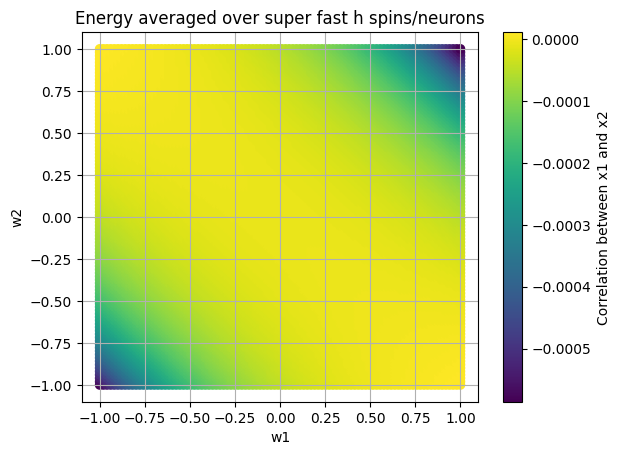

In [19]:
J_hx = 1
J_wh = 1
J_wx = 1
import numpy as np

num_of_w_values = 100
w_values = np.linspace(-1, 1, num_of_w_values)
x_values = [-1,1]
y_values = [-1,1]
h_values = [-1,1]

def probability(x1,x2,w1,w2,y,h1,h2):
        return np.exp(J_hx * x1 * h1 + J_hx * x2 * h2 +
                                                     J_hx * y * h1 + J_hx * y * h2 + 
                                                     J_wx * w1 * y + J_wx * w2 * y + 
                                                     J_wx * x1 * w1 + J_wx * x2 * w2) 

def partition():
    return sum(probability(x1, x2, w1, w2, y, h1, h2) 
          for x1 in x_values
          for x2 in x_values
          for y in y_values
          for h1 in h_values
          for h2 in h_values
          for w1 in w_values
          for w2 in w_values)


partition  = partition()

def mean_energy(x1,x2,w1,w2,y):
    energy = 0
    for h1 in [-1,1]:
        for h2 in [-1,1]:
            energy_for_current_h = (J_hx * x1 * h1 + J_hx * x2 * h2 + J_hx * y * h1 + J_hx * y * h2 + 
              J_wx * w1 * y + J_wx * w2 * y + J_wx * x1 * w1 + J_wx * x2 * w2) 
          
            probability_normalized = probability(x1,x2,w1,w2,y,h1,h2) / partition                        
            energy += energy_for_current_h * probability_normalized

    return energy

def partition_mean_energy():
    
    return sum( np.exp(-mean_energy(x1,x2,w1,w2,y))
          for x1 in [-1, 1]
          for x2 in [1, 1]
          for y in [1, 1]
          for w1 in w_values
          for w2 in w_values) 

partition_mean_energy = partition_mean_energy()


def probability_mean_energy(x1,x2,w1,w2,y):
    return np.exp(-mean_energy(x1,x2,w1,w2,y) ) / partition_mean_energy


def probability_mean_energy_marginal_y(x1,x2,w1,w2):
    return sum( np.exp(-mean_energy(x1,x2,w1,w2,y) ) / partition_mean_energy for y in y_values)

w1_values = []
w2_values = []
correlations = []

for w1 in w_values:
    for w2 in w_values:
        
        mean_x1 = sum( probability_mean_energy_marginal_y(x1,x2,w1,w2) * x1 for x1 in x_values for x2 in x_values )
        mean_x2 =  sum( probability_mean_energy_marginal_y(x1,x2,w1,w2) * x2 for x2 in x_values for x1 in x_values )

       
        covariance = sum( probability_mean_energy_marginal_y(x1,x2,w1,w2) * (x1 - mean_x1) * (x2 - mean_x2) 
                        for x1 in [-1,1] for x2 in [-1,1])

        std_dev_x1 = np.sqrt(sum(probability_mean_energy_marginal_y(x1,x2,w1,w2) * (x1 - mean_x1)**2 for x1 in x_values for x2 in x_values))
        std_dev_x2 = np.sqrt(sum(probability_mean_energy_marginal_y(x1,x2,w1,w2) * (x2 - mean_x2)**2 for x2 in x_values for x1 in x_values))

       
        correlation = covariance / (std_dev_x1 * std_dev_x2)
        w1_values.append(w1)
        w2_values.append(w2)
        correlations.append(correlation)
    
plot(w1_values,w2_values,correlations, h= True)

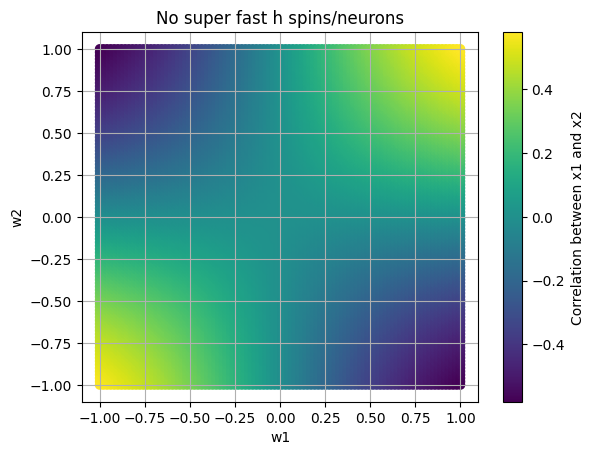

In [20]:
J_hx = 1
J_wh = 1
J_wx = 1
import numpy as np

num_of_w_values = 100
w_values = np.linspace(-1, 1, num_of_w_values)
x_values = [-1,1]
y_values = [-1,1]
h_values = [-1,1]

def probability(x1,x2,w1,w2,y):
        return np.exp( J_wx * w1 * y + J_wx * w2 * y + J_wx * x1 * w1 + J_wx * x2 * w2) 

def partition():
    return sum(probability(x1, x2, w1, w2, y) 
          for x1 in x_values
          for x2 in x_values
          for y in y_values
         
          for w1 in w_values
          for w2 in w_values)


partition  = partition()


def probability_marginal_y(x1,x2,w1,w2):
    return sum( probability(x1,x2,w1,w2,y) / partition for y in y_values)

w1_values = []
w2_values = []
correlations = []

for w1 in w_values:
    for w2 in w_values:
        
        mean_x1 = sum( probability_marginal_y(x1,x2,w1,w2) * x1 for x1 in x_values for x2 in x_values )
        mean_x2 =  sum( probability_marginal_y(x1,x2,w1,w2) * x2 for x2 in x_values for x1 in x_values )

       
        covariance = sum( probability_marginal_y(x1,x2,w1,w2) * (x1 - mean_x1) * (x2 - mean_x2) 
                        for x1 in [-1,1] for x2 in [-1,1])

        std_dev_x1 = np.sqrt(sum(probability_marginal_y(x1,x2,w1,w2) * (x1 - mean_x1)**2 for x1 in x_values for x2 in x_values))
        std_dev_x2 = np.sqrt(sum(probability_marginal_y(x1,x2,w1,w2) * (x2 - mean_x2)**2 for x1 in x_values for x2 in x_values))

        correlation = covariance / (std_dev_x1 * std_dev_x2)
        w1_values.append(w1)
        w2_values.append(w2)
        correlations.append(correlation)
        
plot(w1_values,w2_values,correlations, h=False)
